### How can we predict the trend of a company's stock to gain better profits as a retail trader?
>In this project, we are going to attempt to predict the share price movements of a chosen company by training a model to trade. 

### Background:

>Retail traders are normal people like you and me, who decide to jump into the stock market to try and make money out of it for ourselves. 

### (1) What kind of analysis will we be using in this project?

In this project, we are focusing on Technical Analysis.

There are two main types of analysis done on stocks; Technical and Fundamental.

>Fundamental analysis is done by trying to measure the company's intrinsic value through data such as company balance sheets, and accounts.

>Technical analysis done by analysing the price action of a stock, such as the volume of shares traded everyday to determine the stock's supply and demand dynamics. 


### (2) What is our goal in this project?

>Given the sheer amount of indicators available for use in trading, we've decide to focus on a particular group of indicators which are used very often in trading strategies, Moving Averages (MA). 

>We plan to train our model to figure out which type of MA will help us to generate the best returns, which will thus be the best performing MA for traders to use.




In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
from pandas import DataFrame
import requests
import json 

#Additional Libraries
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set(font_scale = 1.5) # set the default Seaborn style for graphics

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
linreg = LinearRegression()

# Constructing parameters to use API 

Key = "C4TMJ9NCKD4YDEQ9" # Api Key
url = "https://www.alphavantage.co/query?" # Website to request data from
daily = "TIME_SERIES_DAILY_ADJUSTED" # We are doing our analysis on data points of a daily basis.
stock = "AAPL" # Here we are making use of Apple's stock in our analysis

# parameters for "function" in the api.
param = {
    "function" : daily,
    "symbol" : stock,
    "apikey" : Key,
    "outputsize" : "full",
    "interval" : None,
    "time_period" : None,
    "series_type" : None
}

# Indicators that we plan to use

# SMA - Simple Moving Average
# EMA - Exponential Moving Average
# MACD - Moving Average Convergence / Divergence
# SOTCH - Stochastic Oscillator
# RSI - Relative Strength Index
# ADX - Average Directional Movement Index
# CCI - Commidity Channel Index
# AROON -  Aroon Indicator
# BBANDS - Bollinger Bands
# AD - Chaikin A/D line
# OBV - Balance Volume Values


### Due to the constraints of the AlphaVantage API (only 5 pull requests per minute and up to 500 requests per day) and the amount of data we are pulling is likely going to exceed that amount, we have decided to save the pulled requests into files, so we can easily access them and analyse them without encountering any problems.

In [2]:
with open("Data\Stock Time Series Data\AAPL4.json") as json_file: 
    jsonStock = json.load(json_file)
rawStockPrice = pd.DataFrame(jsonStock["Time Series (Daily)"]).T
rawStockPrice.head() # Taking a quick look to see what the data looks like.

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
2021-04-19,133.51,135.47,133.34,134.84,134.84,94264215,0.0000,1.0
2021-04-16,134.3,134.67,133.28,134.16,134.16,84922386,0.0000,1.0
2021-04-15,133.82,135.0,133.64,134.5,134.5,89347102,0.0000,1.0
2021-04-14,134.94,135.0,131.655,132.03,132.03,87222782,0.0000,1.0
2021-04-13,132.44,134.66,131.93,134.43,134.43,91266545,0.0000,1.0


For TA's information,

Open is the price of the stock when the market has **started that day**. (Usually 9.30AM ET)

High is the **highest price** the stock managed to reach that day.

Low is the **lowest price** the stock managed to reach that day.

Close is the price of the stock when the market has **closed that day**. (Usually 5.30PM ET)

Volume is the amount of shares traded that day. ( Bought and Sold )

After taking a quick look at the data, we proceed to clean and organise the data, as well as taking only the first 2000 points as a standardisation. 

In [3]:
stockPrice = rawStockPrice.iloc[6:2006]
stockPrice.info

<bound method DataFrame.info of            1. open   2. high  3. low 4. close 5. adjusted close  6. volume  \
2021-04-09   129.8    133.04  129.47  132.995           132.995  106686703   
2021-04-08  128.95    130.39  128.52   130.36            130.36   88844591   
2021-04-07  125.83    127.92  125.14    127.9             127.9   83466716   
2021-04-06   126.5    127.13  125.65   126.21            126.21   80171253   
2021-04-05  123.87  126.1601  123.07    125.9             125.9   88651175   
...            ...       ...     ...      ...               ...        ...   
2013-05-07  464.97    465.75   453.7  458.658     14.3159524955   17276900   
2013-05-06  455.71     462.2  454.31   460.71     14.3800009466   17737200   
2013-05-03  451.31    453.23  449.15   449.98     14.0450887238   12903600   
2013-05-02  441.78    448.59  440.63   445.52     13.9058801019   15065300   
2013-05-01  444.46    444.93  434.39   439.29     13.7114250089   18103900   

           7. dividend amount 8

#### All the lines in the next box are commented as we have already gathered the data from the API. We're just leaving it here so the TA knows where our data came from.


In [4]:
#Request data from AlphaVantage - data of company's stock price over the past 20 years
#response = requests.get(url,param) # Request for Time-Series Data of stocks
#data = response.json() # Convert Data into json format, and put them into dataframes.
#with open("Data\Stock Time Series Data\AAPL4.json",'w') as json_file:
#   json.dump(data, json_file)
#jsondata = pd.read_json("Data\Stock Time Series Data\AAPL4.json")

# Request data from AlphaVantage
# param["function"] = 'SMA'
# param["interval"] = 'daily'
# param["time_period"] = '10'
# param["series_type"] = 'close'
# response = requests.get(url,param) # Request for Time-Series Data of stocks
# data = response.json() # Convert Data into json format, and put them into dataframes.
# with open("Data\Indicators\SMA10.json",'w') as json_file:
#    json.dump(data, json_file)
# jsondata = pd.read_json("Data\Indicators\SMA10.json")

# param["function"] = 'EMA'
# param["interval"] = 'daily'
# param["time_period"] = '12'
# param["series_type"] = 'close'
# response = requests.get(url,param) # Request for Time-Series Data of stocks
# data = response.json() # Convert Data into json format, and put them into dataframes.
# with open("Data\Indicators\EMA12.json",'w') as json_file:
#    json.dump(data, json_file)
# jsondata = pd.read_json("Data\Indicators\EMA12.json")

# param["function"] = 'WMA'

# response = requests.get(url,param) # Request for Time-Series Data of stocks
# data = response.json() # Convert Data into json format, and put them into dataframes.
# with open("Data\Indicators\WMA10.json",'w') as json_file:
#    json.dump(data, json_file)
# jsondata = pd.read_json("Data\Indicators\WMA10.json")

# param["function"] = 'DEMA'
# response = requests.get(url,param) # Request for Time-Series Data of stocks
# data = response.json() # Convert Data into json format, and put them into dataframes.
# with open("Data\Indicators\DEMA10.json",'w') as json_file:
#    json.dump(data, json_file)
# jsondata = pd.read_json("Data\Indicators\DEMA10.json")

# param["function"] = 'TEMA'
# response = requests.get(url,param) # Request for Time-Series Data of stocks
# data = response.json() # Convert Data into json format, and put them into dataframes.
# with open("Data\Indicators\TEMA10.json",'w') as json_file:
#    json.dump(data, json_file)
# jsondata = pd.read_json("Data\Indicators\TEMA10.json")

# param["function"] = 'TRIMA'
# response = requests.get(url,param) # Request for Time-Series Data of stocks
# data = response.json() # Convert Data into json format, and put them into dataframes.
# with open("Data\Indicators\TRIMA10.json",'w') as json_file:
#     json.dump(data, json_file)
# jsondata = pd.read_json("Data\Indicators\TRIMA10.json")

# param["function"] = 'KAMA'
# response = requests.get(url,param) # Request for Time-Series Data of stocks
# data = response.json() # Convert Data into json format, and put them into dataframes.
# with open("Data\Indicators\KAMA10.json",'w') as json_file:
#    json.dump(data, json_file)
# jsondata = pd.read_json("Data\Indicators\KAMA10.json")

#param["function"] = 'MAMA'
#response = requests.get(url,param) # Request for Time-Series Data of stocks
#data = response.json() # Convert Data into json format, and put them into dataframes.
#with open("Data\Indicators\MAMA10.json",'w') as json_file:
#    json.dump(data, json_file)
#jsondata = pd.read_json("Data\Indicators\MAMA10.json")


In [5]:
# We load up all the required files here.
# We clean up the data by taking only the data we need, then we create a dataframe for every indicator collected, 
# and only take the first 2000 points. 
with open("Data\Stock Time Series Data\AAPL4.json") as json_file: 
    jsonStock = json.load(json_file)
stockPrice = pd.DataFrame(jsonStock["Time Series (Daily)"],["5. adjusted close"]).T.iloc[6:2006]
stockPrice = stockPrice.rename(columns={"5. adjusted close" : 'Close'})

with open("Data\Indicators\SMA10.json") as json_file: 
    jsonSMA10 = json.load(json_file)
SMA10 = pd.DataFrame(jsonSMA10["Technical Analysis: SMA"]).T.iloc[:2000]

with open("Data\Indicators\EMA12.json") as json_file: 
    jsonEMA12 = json.load(json_file)
EMA12 = pd.DataFrame(jsonEMA12["Technical Analysis: EMA"]).T.iloc[:2000]

with open("Data\Indicators\WMA10.json") as json_file: 
    jsonWMA10 = json.load(json_file)
WMA10 = pd.DataFrame(jsonWMA10["Technical Analysis: WMA"]).T.iloc[:2000]

with open("Data\Indicators\DEMA10.json") as json_file: 
    jsonDEMA10 = json.load(json_file)
DEMA10 = pd.DataFrame(jsonDEMA10["Technical Analysis: DEMA"]).T.iloc[:2000]

with open("Data\Indicators\TEMA10.json") as json_file: 
    jsonTEMA10 = json.load(json_file)
TEMA10 = pd.DataFrame(jsonTEMA10["Technical Analysis: TEMA"]).T.iloc[:2000]

with open("Data\Indicators\TRIMA10.json") as json_file: 
    jsonTRIMA10 = json.load(json_file)
TRIMA10 = pd.DataFrame(jsonTRIMA10["Technical Analysis: TRIMA"]).T.iloc[:2000]

with open("Data\Indicators\KAMA10.json") as json_file: 
    jsonKAMA10 = json.load(json_file)
KAMA10 = pd.DataFrame(jsonKAMA10["Technical Analysis: KAMA"]).T.iloc[:2000]

with open("Data\Indicators\MAMA10.json") as json_file: 
    jsonMAMA10 = json.load(json_file)
MAMA10 = pd.DataFrame(jsonMAMA10["Technical Analysis: MAMA"]).T.iloc[:2000]



In [6]:
# We combine the collected data here, so we can easily see the data of each technical indicator.

combine = [stockPrice,SMA10, EMA12, WMA10, DEMA10, TEMA10, TRIMA10, KAMA10, MAMA10]

result = pd.concat(combine, axis=1).astype(float)
result = result.iloc[::-1]
result.head(10)

,Close,SMA,EMA,WMA,DEMA,TEMA,TRIMA,KAMA,MAMA,FAMA
2013-05-01,13.711425,12.8928,13.1774,13.1721,13.3657,13.6398,12.8460,13.1490,15.5327,14.9082
2013-05-02,13.905880,13.0597,13.2895,13.3563,13.5687,13.8542,13.0354,13.3874,15.5165,14.9112
2013-05-03,14.045089,13.2452,13.4057,13.5354,13.7616,14.0468,13.2420,13.6185,15.5017,14.9142
2013-05-06,14.380001,13.4389,13.5556,13.7418,14.0109,14.3114,13.4526,13.8885,15.4905,14.9171
2013-05-07,14.315952,13.6028,13.6726,13.9012,14.1688,14.4414,13.6470,14.0185,15.4788,14.9199
2013-05-08,14.477697,13.7850,13.7964,14.0603,14.3329,14.5822,13.8288,14.1680,15.4688,14.9226
2013-05-09,14.352222,13.9456,13.8819,14.1634,14.4060,14.6002,13.9903,14.2147,15.4576,14.9253
2013-05-10,14.232821,14.0667,13.9359,14.2156,14.4137,14.5397,14.1194,14.2179,15.4454,14.9279
2013-05-13,14.288437,14.1530,13.9902,14.2560,14.4312,14.5084,14.2114,14.2276,15.4338,14.9304
2013-05-14,13.946575,14.1656,13.9835,14.2184,14.3253,14.3195,14.2593,14.2242,15.4189,14.9329


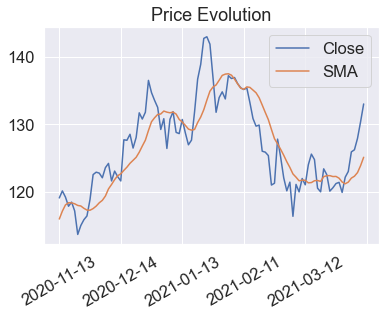

In [7]:
#Firstly, let's take a look at how the stockPrice and SMA looks like in a graph, as an example.
result.iloc[1900:2000].plot(y= ['Close','SMA'])
plt.title('Price Evolution')
plt.xticks(rotation = 30)
plt.legend(result.columns)


### We have only picked the latest 100 days for this graph so we can have a clearer view of the SMA and AAPL stock lines.

### The blue line represents the price of the AAPL stock, while SMA shows us the moving average of the stock price, averaged out over the past 20 days from its recent point. 

### SMA is one of the indicators used to determine if a stock price is underpriced or overvalued. 

>If the AAPL stock price is above the SMA line, it means that the stock is overvalued and we should not be buying the stock. 

>If the AAPL stock price is below the SMA line, it means that the stock is undervalued and we can consider buying the stock.

In [8]:
result.corr()

,Close,SMA,EMA,WMA,DEMA,TEMA,TRIMA,KAMA,MAMA,FAMA
Close,1.000000,0.998264,0.998455,0.998981,0.999475,0.999675,0.997999,0.997838,0.983481,0.960380
SMA,0.998264,1.000000,0.999897,0.999837,0.999193,0.998614,0.999962,0.999518,0.986138,0.962069
EMA,0.998455,0.999897,1.000000,0.999802,0.999127,0.998675,0.999811,0.999617,0.987160,0.963055
WMA,0.998981,0.999837,0.999802,1.000000,0.999727,0.999378,0.999797,0.999353,0.985429,0.961652
DEMA,0.999475,0.999193,0.999127,0.999727,1.000000,0.999877,0.999117,0.998563,0.983214,0.959871
TEMA,0.999675,0.998614,0.998675,0.999378,0.999877,1.000000,0.998493,0.998078,0.983201,0.960084
TRIMA,0.997999,0.999962,0.999811,0.999797,0.999117,0.998493,1.000000,0.999450,0.985910,0.961823
KAMA,0.997838,0.999518,0.999617,0.999353,0.998563,0.998078,0.999450,1.000000,0.986506,0.962309
MAMA,0.983481,0.986138,0.987160,0.985429,0.983214,0.983201,0.985910,0.986506,1.000000,0.986966
FAMA,0.960380,0.962069,0.963055,0.961652,0.959871,0.960084,0.961823,0.962309,0.986966,1.000000


### Here we look at the correlation of close and all the moving averages. 
### Below is a heatmap, which is easier to look at.

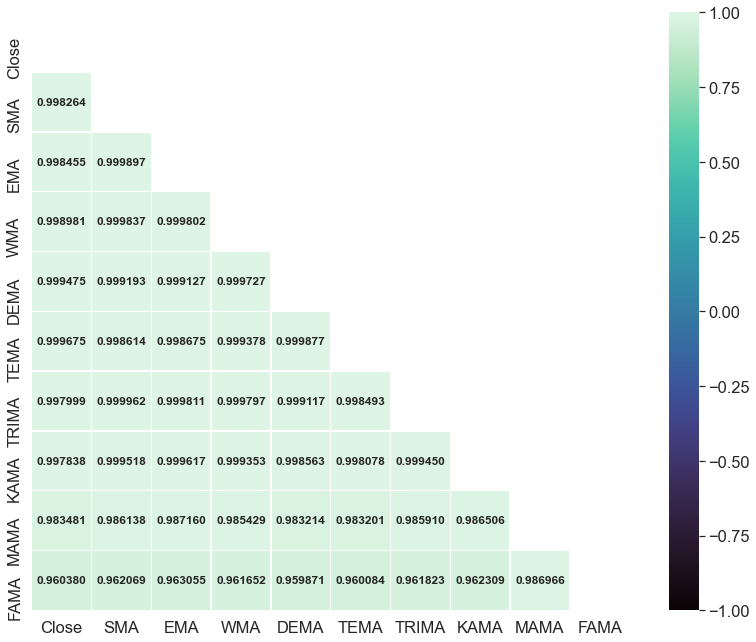

In [9]:
# Print the heatmap between all variables to get a numerical evidence of the relationship to visualise easily

# Here, we extended our application of what we learnt in the course pertaining to the heatmap
# representation by masking the other half of the heatmap. 
# It is also indirectly saying that we are only going to be focusing on the Upper Triangular in the concept
# of Matrixes.

corr = np.corrcoef(np.random.randn(10, 20))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sb.axes_style("white"):
    f, ax = plt.subplots(figsize=(14, 11))
    ax = sb.heatmap(result.corr(), mask=mask, vmin = -1, vmax=1, cmap = "mako", 
                    annot = True, annot_kws ={'size':12, 'weight':'bold'}, fmt = ".6f", linewidths = .5, square=True)        

From the heatmap representation above, it can be clearly seen that there are **numerous MA indicator** that provides an **extreme linear relationship** when compared against the **close price at the end of each trading days**.

### It is unsurprising that the correlation between the stock price and moving averages is extremely high, as the moving averages are derived from the stock price.

In order to avoid extreme long coding and large file size, we have made used of the generalised approach to witness the linear regressions.

In [10]:
MAIndicators = [SMA10, EMA12, WMA10, DEMA10, TEMA10, TRIMA10, KAMA10, MAMA10]

MATable = pd.concat(MAIndicators, axis=1).astype(float)
MATable = MATable.iloc[::-1]
MATable.head(10)

,SMA,EMA,WMA,DEMA,TEMA,TRIMA,KAMA,MAMA,FAMA
2013-05-01,12.8928,13.1774,13.1721,13.3657,13.6398,12.8460,13.1490,15.5327,14.9082
2013-05-02,13.0597,13.2895,13.3563,13.5687,13.8542,13.0354,13.3874,15.5165,14.9112
2013-05-03,13.2452,13.4057,13.5354,13.7616,14.0468,13.2420,13.6185,15.5017,14.9142
2013-05-06,13.4389,13.5556,13.7418,14.0109,14.3114,13.4526,13.8885,15.4905,14.9171
2013-05-07,13.6028,13.6726,13.9012,14.1688,14.4414,13.6470,14.0185,15.4788,14.9199
2013-05-08,13.7850,13.7964,14.0603,14.3329,14.5822,13.8288,14.1680,15.4688,14.9226
2013-05-09,13.9456,13.8819,14.1634,14.4060,14.6002,13.9903,14.2147,15.4576,14.9253
2013-05-10,14.0667,13.9359,14.2156,14.4137,14.5397,14.1194,14.2179,15.4454,14.9279
2013-05-13,14.1530,13.9902,14.2560,14.4312,14.5084,14.2114,14.2276,15.4338,14.9304
2013-05-14,14.1656,13.9835,14.2184,14.3253,14.3195,14.2593,14.2242,15.4189,14.9329


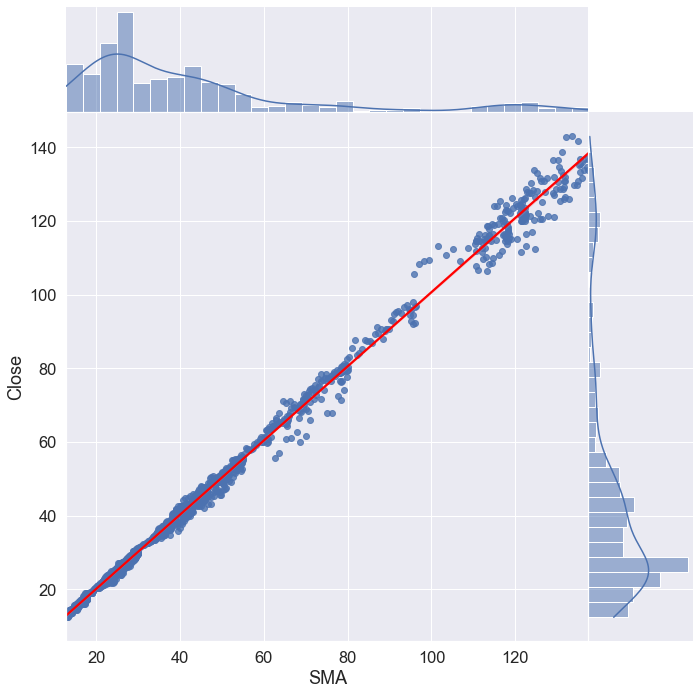

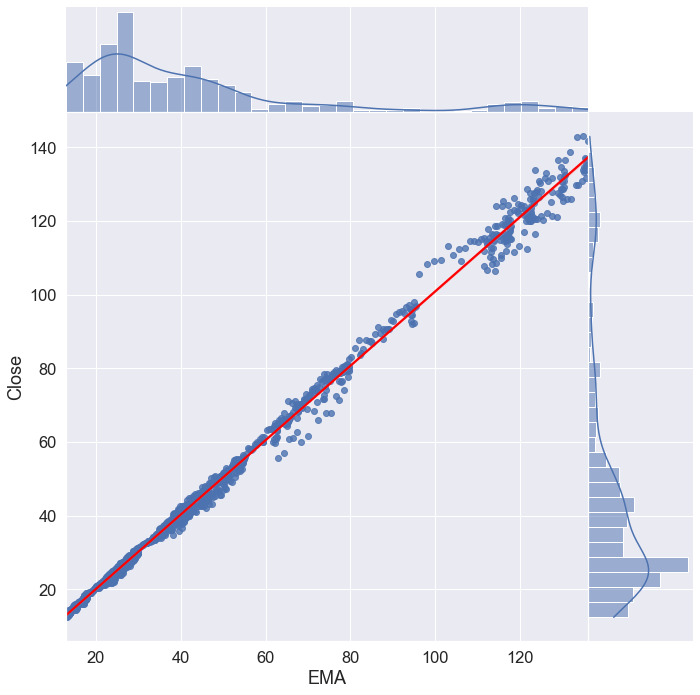

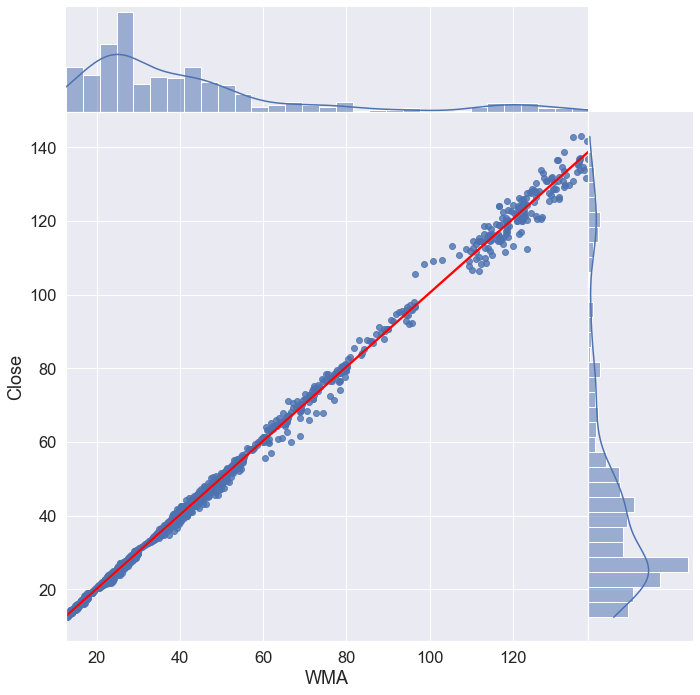

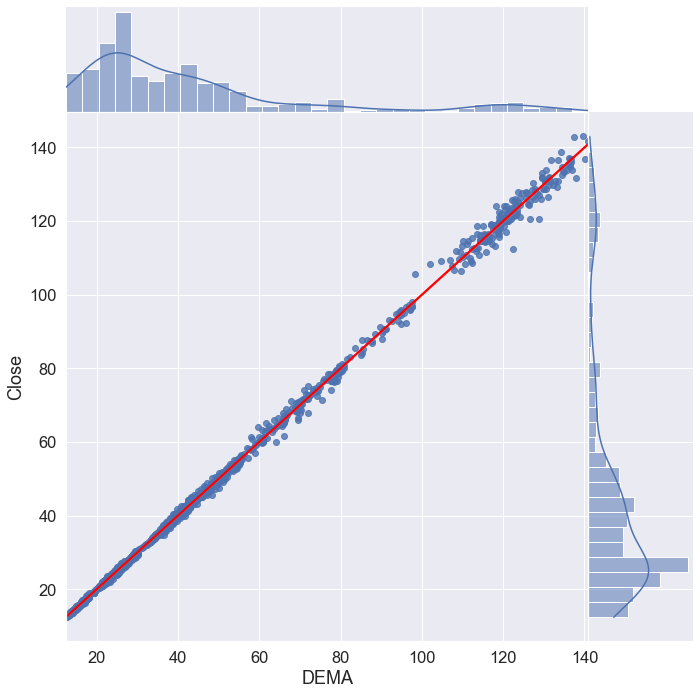

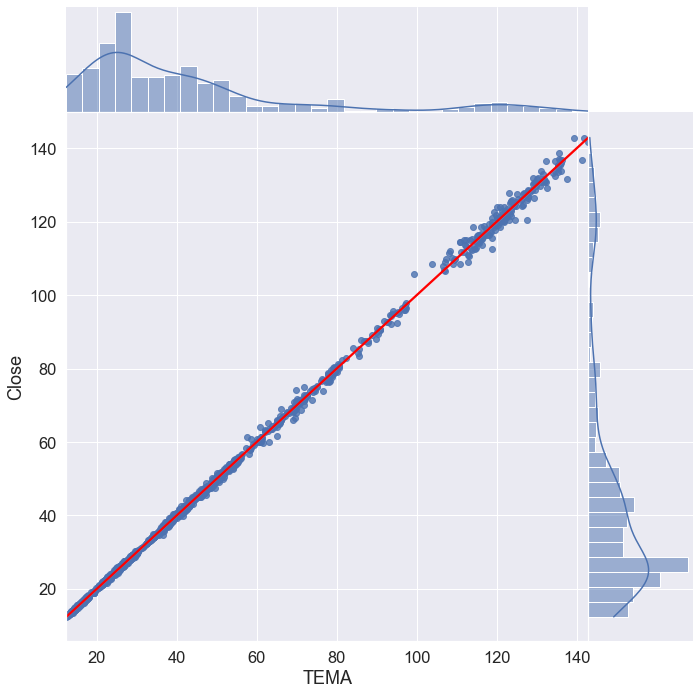

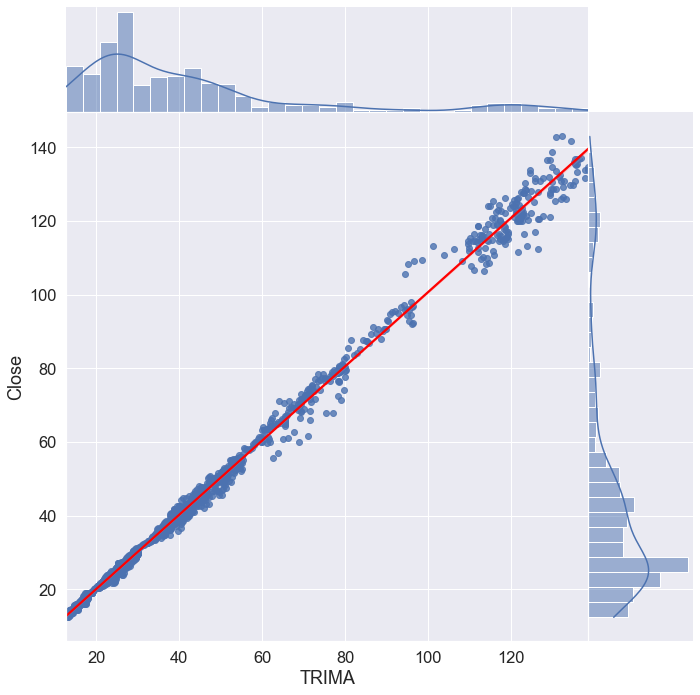

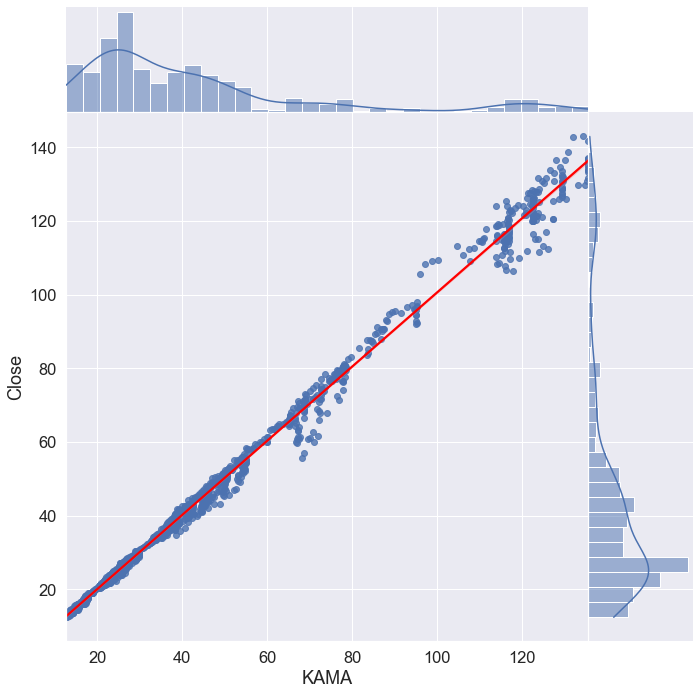

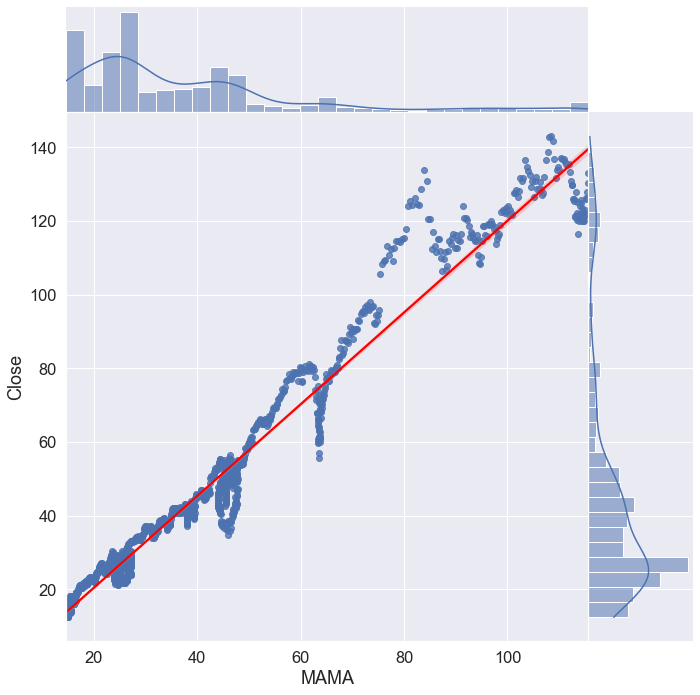

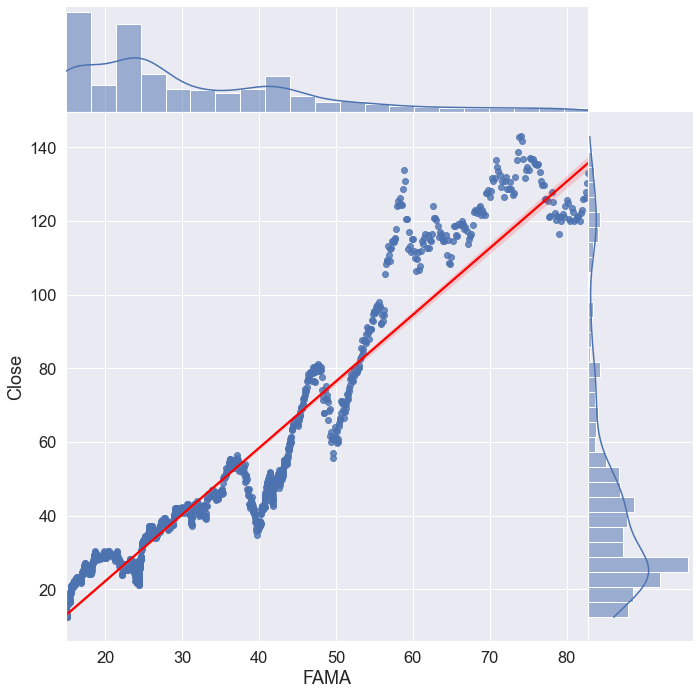

In [11]:
#ClosePrice = [stockPrice]

#CPTable = pd.concat(ClosePrice, axis=1).astype(float)

#for counter, item in enumerate(MATable):
    
#    d = MATable[item]
    
#    linreg.fit(MATable,CPTable)
    
#    jointDF = pd.concat([CPTable, d], axis = 1).reindex(CPTable.index)
#    sb.jointplot(data = jointDF, x = item, y = "Close", height = 10, kind = "reg", joint_kws={'line_kws':{'color':'red'}}, space = 0)


In [24]:
#for counter, item in enumerate(MATable):
#    d = MATable[item]
    
    #linreg.fit(MATable,CPTable)
    
    #CPTable_pred = linreg.predict(CPTable)
    
#    print('====================================================')
#    print()
#    print('Relation between Close and', item)
#    print()
#    print('Intercept \t: b = ', linreg.intercept_)
#    print('Coefficients: a = ', linreg.coef_)
#    print()
    #print("Explained Variance (R^2) \t:", linreg.score(MATable, CPTable))
    #print("Mean Squared Error (MSE) \t:", mse(CPTable, CPTable_pred))
#    print()


Based on what was derived in the initial phases without going through the train and testing phases, it can be determine that the relationship that **each MA indicator** has towards **Close** is of multi-variated. 

**Important to note that Multi-Variate is out of what was taught,
this serves as part of the additional coverage that we will be going through in this project.**

Recall that a Multi-Variate Linear Model is derived by:

> **Total = a1 X Variate_1 + a2 X Variate_2 + ... an X Variate_n + b + error** 

Where:
> **an** represents each coefficients of the linear model, 

> **b** represents the intercept of the linear model

In [61]:
# Test for linear regression

In [62]:
price = pd.DataFrame(result['Close'])
SMA = pd.DataFrame(result[['SMA','EMA','WMA','DEMA','TEMA','TRIMA','KAMA','MAMA','FAMA']])

Train Set (1500, 9) (1500, 1)
Test Set (500, 9) (500, 1)


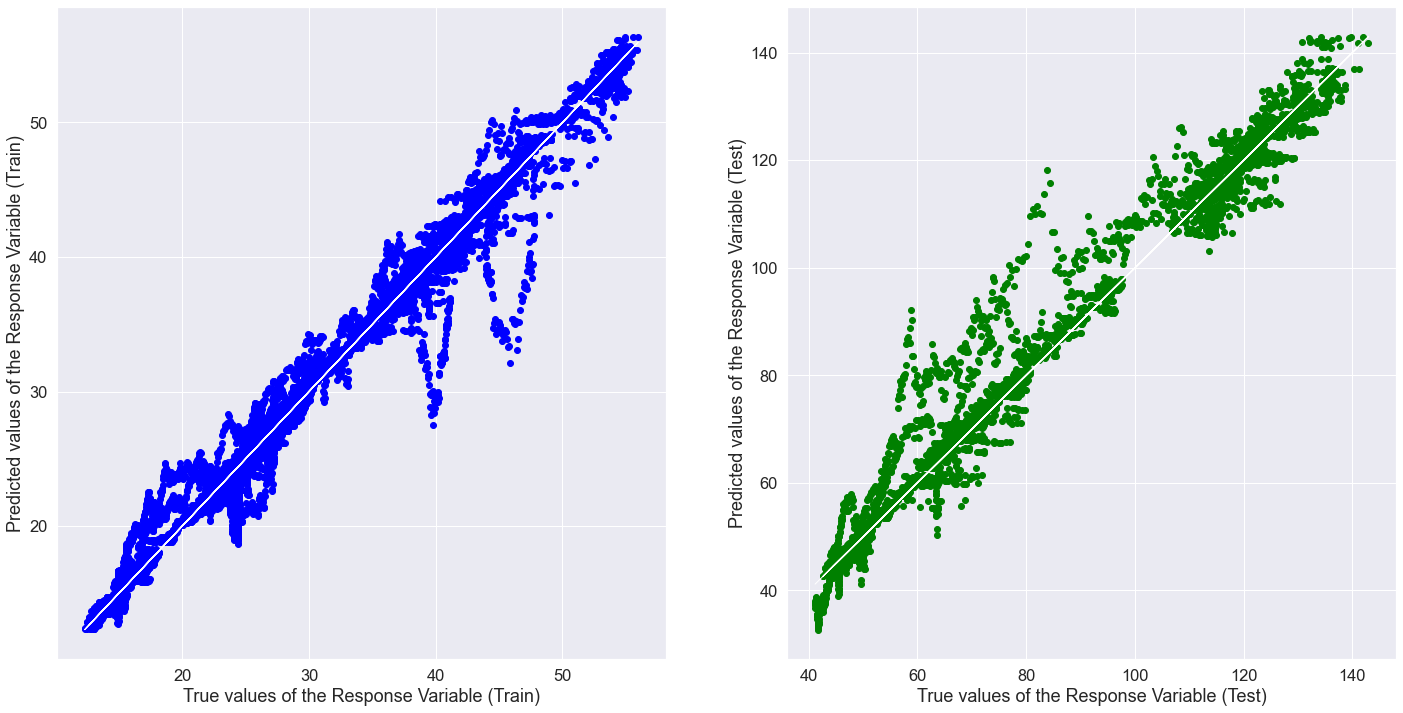

In [74]:
SMA_train, SMA_test, price_train, price_test = train_test_split(price,SMA, test_size = 0.25, shuffle = False)
print("Train Set", price_train.shape, SMA_train.shape)
print("Test Set", price_test.shape, SMA_test.shape)
# Before fitting regression line
linreg = LinearRegression()
linreg.fit(SMA_train,price_train)
price_train_pred = linreg.predict(SMA_train)
price_test_pred = linreg.predict(SMA_test)
# Predict Total values corresponding to HP Train
price_test_pred = linreg.predict(SMA_test)

# Plot the Linear Regression line
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(price_train, price_train_pred, color = "blue")
axes[0].plot(price_train, price_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(price_test, price_test_pred, color = "green")
axes[1].plot(price_test, price_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

Moving on, we then proceed to split the data into 2 parts:

> Train Data 70%

> Test Data 30%

In [75]:
print("Explained Variance (R^2) \t:", linreg.score(SMA_train, price_train))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(price_train, price_train_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.9660571422169011
Mean Squared Error (MSE) 	: 2.4720422976181933
Root Mean Squared Error (RMSE) 	: 1.5722729717253914


References we have used to learn to code

https://realpython.com/api-integration-in-python/